In [114]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

MAX_ITERATIONS = 5 * pow(10, 5)
EPSILON_THRESHOLD = pow(10, -2) # pow(10, -3)
DISCOUNT_FACTOR = 0.9


def get_best_actions(env, state, V):
	A = np.zeros(env.action_space.n)

	for a in range(env.action_space.n):
		for prob, next_state, reward, done in env.P[state][a]:
			A[a] += prob * DISCOUNT_FACTOR * V[next_state]
			A[a] += reward

	return A


def value_iteration(env, V):
	states_len = env.observation_space.n
	num_iter = 0
	V_new = copy.deepcopy(V)

	ans = []
	x = []
	while True:
		delta = 0
		num_iter += 1

		for state in range(states_len):
			# A = get_best_actions(env, state, V)
			A = np.zeros(env.action_space.n)

			for a in range(env.action_space.n):
				for prob, next_state, reward, done in env.P[state][a]:
					A[a] += prob * DISCOUNT_FACTOR * V[next_state]
					A[a] += reward

			best_action_value = np.max(A)
			delta = max(delta, np.abs(best_action_value - V[state]))

			x.append(np.abs(best_action_value - V[state]))

			V_new[state] = best_action_value

		ans.append(np.linalg.norm(x))
		x = []

		V = copy.deepcopy(V_new)
		if delta < EPSILON_THRESHOLD or num_iter > MAX_ITERATIONS:
			break

	# print("iterations: ", num_iter)

	policy = np.zeros([states_len])
	# # policy = [random.randint(0,env.action_space.n-1) for state in range(env.observation_space.n)]
	# for state in range(states_len):
	# 	A = get_best_actions(env, state, V_new)
	# 	policy[state] = np.argmax(A)



	return policy, V_new, ans

def policy_iteration_run_trials(env, V):
	instances = 5
	policy_list, V_new_list, ans_list = [], [], []
	for _ in range(instances):
		print("AIICIICI")
		policy, V_new, ans = policy_iteration(env, V)
		policy_list.append(policy)
		V_new_list.append(V_new)
		ans_list.append(ans_list)

	print("aici")
	ave = [np.mean(ans) for ans in ans_list]
	print("ave", ave)
	indexes = np.argsort(ave)

	print("am trecut")

	idx = indexes[instances // 2]

	return policy[idx], V_new[idx], ans[idx]

def policy_iteration(env, V):
	states_len = env.observation_space.n
	num_iter = 0
	# V_new = V[:]
	V_new = copy.deepcopy(V)

	policy = [random.randint(0,env.action_space.n-1) for state in range(states_len)]
	# np.zeros(len(states_len))

	
	ans = []
	x = []
	while True:
		delta = 0
		num_iter += 1
		# x = []

		
		for state in range(states_len):
			# A = get_best_actions(env, state, V)
			A = np.zeros(env.action_space.n)

			for a in range(env.action_space.n):
				for prob, next_state, reward, done in env.P[state][policy[state]]:
					A[a] += prob * DISCOUNT_FACTOR * V[next_state]
					A[a] += reward

			best_action_value = np.max(A)
			delta = max(delta, np.abs(best_action_value - V[state]))
			x.append(np.abs(best_action_value - V[state]))
			V_new[state] = best_action_value
			
			# print("x_old", best_action_value)
			# x_new.append(V_new[state])

		ans.append(np.linalg.norm(x))
		x = []

		# V = V_new[:]
		V = copy.deepcopy(V_new)
		if delta < EPSILON_THRESHOLD or num_iter > MAX_ITERATIONS:
			break

		for state in range(states_len):
			A = np.zeros(env.action_space.n)

			for a in range(env.action_space.n):
				for prob, next_state, reward, done in env.P[state][a]:
					A[a] += prob * DISCOUNT_FACTOR * V[next_state]
					A[a] += reward
			policy[state] = np.argmax(A)

		# ans.append(np.linalg.norm(x)) #np.array(x_new) - np.array(x_old)))

	return policy, V_new, ans


def gauss_seidel_vi(env, V):
	states_len = env.observation_space.n
	num_iter = 0
	x = []
	ans = []

	while True:
		delta = 0
		num_iter += 1

		for state in range(states_len):
			A = np.zeros(env.action_space.n)

			for a in range(env.action_space.n):
				for prob, next_state, reward, done in env.P[state][a]:
					A[a] += prob * DISCOUNT_FACTOR * V[next_state]
					A[a] += reward
			best_action_value = np.max(A)
			delta = max(delta, np.abs(best_action_value - V[state]))
			x.append(np.abs(best_action_value - V[state]))
			V[state] = best_action_value
		
		if delta < EPSILON_THRESHOLD or num_iter > MAX_ITERATIONS:
			break

		# print("x",np.linalg.norm(x),  x)
		
		ans.append(np.linalg.norm(x))
		x = []


	# print("iterations: ", ans)

	policy = np.zeros([states_len])
	for state in range(states_len):
		A = get_best_actions(env, state, V)
		policy[state] = np.argmax(A)

	return policy, V, ans


def prioritized_sweeping_vi(env, V):
	policy, V, x = value_iteration(env, V)
	states_len = env.observation_space.n
	# V = old_val
	print("V", V)
	H = np.zeros(states_len)

	x = []
	# ans = []
	num_iter = 0
	delta = 0
	for state in range(states_len):
		A = get_best_actions(env, state, V)
		best_action_value = np.max(A)
		H[state] = max(delta, np.abs(best_action_value - V[state]))
		
	print("H", H)

	while True:
		num_iter += 1
	
		newV = copy.deepcopy(V)
		s_k = np.argmax(H)
		print("s_k", s_k, "H[s_k]", H[s_k])

		newV[s_k] = max(get_best_actions(env, s_k, V))

		H[s_k] = abs(V[s_k] - newV[s_k])
		x.append(H[s_k])
		print(x)
		
		V = copy.deepcopy(newV)

		
		if iter!= 1 and (H[s_k] < EPSILON_THRESHOLD or num_iter > MAX_ITERATIONS):
			break

	policy = np.zeros([states_len])
	for state in range(states_len):
		A = get_best_actions(env, state, V)
		policy[state] = np.argmax(A)

	return policy, V, x


def apply_algorithm(game_name, algorithm):
	env = gym.make(game_name)
	states_len = env.observation_space.n
	# _x = dict()
	value_iter = None
	value_iter_old = np.zeros(states_len)
	observation = env.reset(seed=0)
	# iter_results = []
	for _ in range(1):

		# env.render()


		if value_iter is not None:
			value_iter_old = value_iter[:]

		# policy, value_iter, x = gauss_seidel_vi(env, value_iter_old)
		policy, value_iter, x = algorithm(env, value_iter_old)
		# iter_results.append(x)

		observation, reward, terminated, truncated , info = env.step(int(policy[env.s]))

		if terminated:
			break

	values_y = [i for i in range(len(x))]
	print("algorithm", algorithm, x)

	return values_y, x
	


In [115]:
def plot_algorithms(results, title):
    plt.figure(figsize=(10, 10))

    for x, y, name in results:
        plt.plot(x, y, label=name)
    plt.title("Enviroment " + title)
    plt.xlabel("Iterations")
    plt.ylabel("||V - V*||")
    plt.legend()
    plt.show()

### FrozenLake8x8-v1

In [116]:
frozen = 'FrozenLake-v1'
frozen_large = 'FrozenLake8x8-v1'
taxi = 'Taxi-v3'

algorithms = [(value_iteration, 'VI'), (policy_iteration, 'PI'), (gauss_seidel_vi, 'GS-VI'), (prioritized_sweeping_vi, 'PS-VI')] # (policy_iteration_run_trials, 'PI')]

algorithm <function value_iteration at 0x7f217745b640> [1.4142135623730951, 0.6000000000000001, 0.39230090491866065, 0.2792901716852922, 0.20966330150982548, 0.1619554438726898, 0.12854814838806516, 0.10471277435795502, 0.08716070579229147, 0.07400297061937358, 0.0638269943724879, 0.055784998238006596, 0.04928378912265425, 0.04391018519125767, 0.0393657012335309, 0.03543945086571504, 0.031994338804002743]
algorithm <function policy_iteration at 0x7f217745b0a0> [1.0, 1.0862780491200217, 0.5108815909777921, 0.33614728914569586, 0.24418212465289088, 0.18400376191806514, 0.1445909217274722, 0.11677710810351496, 0.09689286981865947, 0.08201625359342174, 0.07059998574659132, 0.06158280841450763, 0.0542692533058722, 0.0482550365729384, 0.04319000410098116, 0.03885307888918636, 0.03506166046718718, 0.03170916159767362]
algorithm <function gauss_seidel_vi at 0x7f217745b1c0> [1.4142135623730951, 0.6958448102845922, 0.45155252186207523, 0.31508917750535315, 0.22732978022235206, 0.1712610710439557

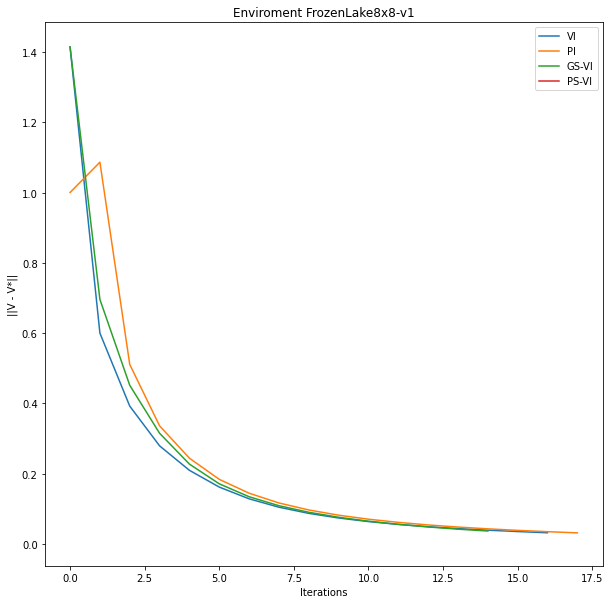

In [117]:
results = []

for algo, name in algorithms:
	y, x = apply_algorithm(frozen_large, algo)
	results.append((y, x, name))

plot_algorithms(results, "FrozenLake8x8-v1")

### FrozenLake-v1

algorithm <function value_iteration at 0x7f217745b640> [1.0, 0.5196152422706632, 0.33674916480965483, 0.25897490225888686, 0.1938930890980903, 0.15380191611290156, 0.12149829898809272, 0.09891721459220323, 0.08096792376841028, 0.06738092058588083, 0.05641870688433025, 0.047647089062740816, 0.04040306336170821, 0.034499800337566805, 0.02966551115255556, 0.025633865720392956, 0.022299450822415075]
algorithm <function policy_iteration at 0x7f217745b0a0> [1.0, 0.5196152422706632, 0.33674916480965483, 0.25897490225888686, 0.1938930890980903, 0.15380191611290156, 0.12149829898809272, 0.09891721459220323, 0.08096792376841028, 0.06738092058588083, 0.05641870688433025, 0.047647089062740816, 0.04040306336170821, 0.034499800337566805, 0.02966551115255556, 0.025633865720392956, 0.022299450822415075]
algorithm <function gauss_seidel_vi at 0x7f217745b1c0> [1.0, 0.5762811813689565, 0.43123901725145425, 0.3065527683189307, 0.2182767766498178, 0.15886220671817308, 0.119088533318472, 0.09191028652525304

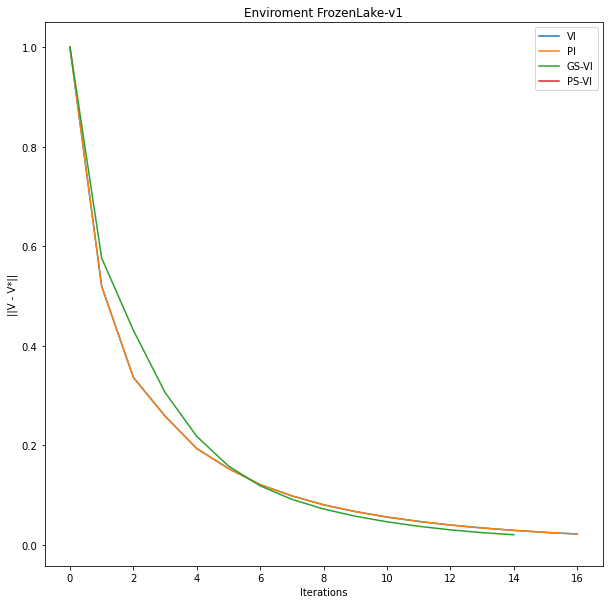

In [120]:
results = []

for algo, name in algorithms:
	y, x = apply_algorithm(frozen, algo)
	results.append((y, x, name))

plot_algorithms(results, "FrozenLake-v1")

### Taxi-v3

algorithm <function value_iteration at 0x7f217745b640> [45.78209256903839, 62.929245983088, 72.8144498022199, 80.09384689849776, 88.16187352682563, 95.27954589755137, 98.5891094289507, 97.55029142698719, 93.89909830554727, 89.66671249105966, 85.37354402482786, 82.26926481753527, 78.42595802903202, 74.6655510132969, 69.03827850019208, 64.53792107227638, 58.31952361357515, 53.11806728778301, 47.23881412699584, 43.02563450310421, 38.26343944286663, 34.85076394751439, 30.993385948721905, 28.22911879748657, 25.104642618464666, 22.865586225964055, 20.33476052095633, 18.52112484303085, 16.47115602197457, 15.002111122854918, 13.341636377799336, 12.151710009512447, 10.806725466017427, 9.842885107705028, 8.753447627474092, 7.972736937241059, 7.0902925782539885, 6.457916919165227, 5.743136988385713, 5.230912704523829, 4.651940960592422, 4.237039290664297, 3.768072178079873, 3.432001825438089, 3.052138464244728, 2.7799214786048982, 2.4722321560382503, 2.251736397669986, 2.0025080463909837, 1.82390

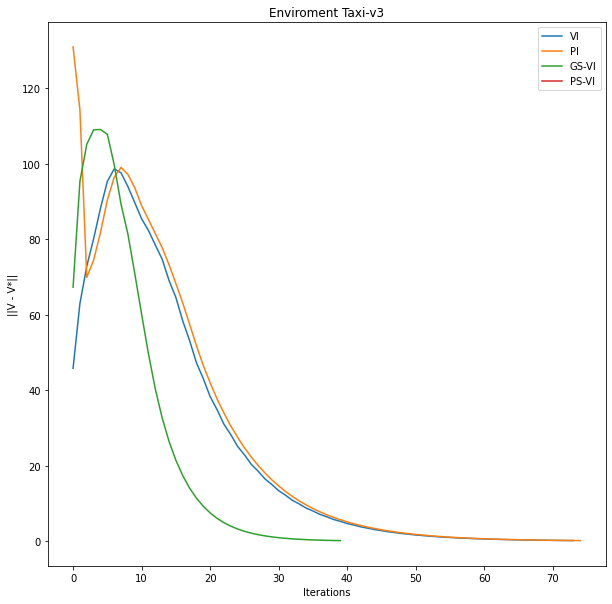

In [119]:
results = []

for algo, name in algorithms:
	y, x = apply_algorithm(taxi, algo)
	results.append((y, x, name))

plot_algorithms(results, "Taxi-v3")